# Final Project Notebook

## MKTG 6620 Machine Learning

Author: Matthew Johnescu

1. Which machine learning methods did you implement?

Penalized Regression, Ensemble Methods, PCA and Cluster Analysis, and Neural Networks

2. Discuss the key contribution of each method to your analysis. If a method didn't contribute, discuss why it didn't. A sentence or two for each method is plenty.

**Penalized Regression:** Relationship between variables and total quantity, **Ensemble Methods:** Helped explore feature importance related to total sales, helping to uncover specific features that have and affect on sales, **PCA and Clustering Analysis:** PCA was used to help size customer segment groups in the data, while clustering analysis was used to cluster the data into multiple groups, **Neural Networks:** This method was not used because of overall model accuracy and results that are similar to other models in the dataset. 

3. Did all methods support your conclusions or did some provide conflicting results? If so they provided conflicting results, how did you reconcile the differences?

The methods used to support my results, I did not find any conflicting feature importance between the models used, often the dependent variable was different enough in the analysis that no conflicts could be present. 

# Table of Contents

- [Importing Packages](#importing-packages)
- [Loading Data](#loading-data)
- [Data Exploration](#data-exploration)
    - [Summary Statistics](#summary-statistics)
    - [Visualizing Distribution of Loyalty Members](#visulizing-the-distribution-of-loyalty-member)
    - [Histograms of Numeric Variables](#histograms-of-numeric-variables)
    - [Heatmap of Numeric Variables](#heatmap-of-numeric-variables)
- [Penalized Regression](#penalized-regression)
    - [Regression Package Imports](#regression-package-imports)
    - [Regression Data Preparation](#regression-data-preparation)
    - [Running Models](#running-models)
        - [Cross Validation](#cross-validation)
    - [Comparison of Model Predictions for Total Price vs. Quantity Purchased](#comparison-of-model-predictions-for-total-price-vs-quantity-purchased)
    - [Penalized Regression Conclusion](#penalized-regression-conclusion)
- [Support Vector Machines](#support-vector-machines)
    - [SVM Package Imports](#svm-package-imports)
    - [SVM Data Preparation](#svm-data-preparation)
    - [Training and Running Model](#training-and-running-model)
    - [Evaluate and Visualize Model Performance](#evaluate-and-visualize-model-performance)
    - [SVM Conclusion](#svm-conclusion)
- [Ensemble Methods](#ensemble-methods)
    - [Ensemble Methods Overview](#ensemble-methods-overview)
    - [Ensemble Methods Package Imports](#ensemble-methods-package-imports)
    - [Ensemble Methods Data Preparation](#ensemble-methods-data-preparation)
    - [Running Model](#running-model)
    - [Evaluating Ensemble Model](#evaluating-ensemble-model)
    - [Visualizing Ensemble Method Feature Importance](#visualizing-ensemble-method-feature-importance)
    - [Visualizing Model Performance](#visualizing-model-performance)
- [PCA and Clustering Analysis](#pca-and-clustering-analysis-methods)
    - [PCA and Clustering Analysis Imports](#pca-and-clustering-analysis-imports)
    - [PCA and Clustering Data Preparation](#pca-and-clustering-data-preparation)
    - [Performing PCA Analysis](#performing-pca-analysis)
    - [Performing PCA with Components](#performing-pca-with-components)
    - [Performing Cluster Analysis](#performing-cluster-analysis)
        - [Optimal K and KMeans Clustering](#optimal-k-and-kmeans-clustering)
        - [Cluster Analysis on PCA Data](#cluster-analysis-on-pca-data)
    - [Visualizing Cluster Analysis](#visualizing-cluster-analysis)
    - [Comparing Clustering Results](#comparing-clustering-results)
- [Neural Network](#neural-networks)
    - [Neural Network Package Imports](#neural-networks-package-imports)
    - [Neural Network Data Preparation](#neural-network-data-preparation)
    - [Neural Network Model](#neural-network-model)
    - [Evaluating Model and Model Results](#evaluating-model-and-model-results)
    


# Importing Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [20]:
# Add File Path of the CSV file here
file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
# file_path = "C:/Users/matt/Downloads/archive (2)/Electronic_sales_Sep2023-Sep2024.csv"
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Data Exploration

## Summary Statistics

In [21]:
# Explore the data
# Display the first few rows
print("First few rows of the data:")
display(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the data:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56



Data types:
Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

Summary statistics:


,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000



Missing values in each column:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


## Visulizing the Distribution of Loyalty Member

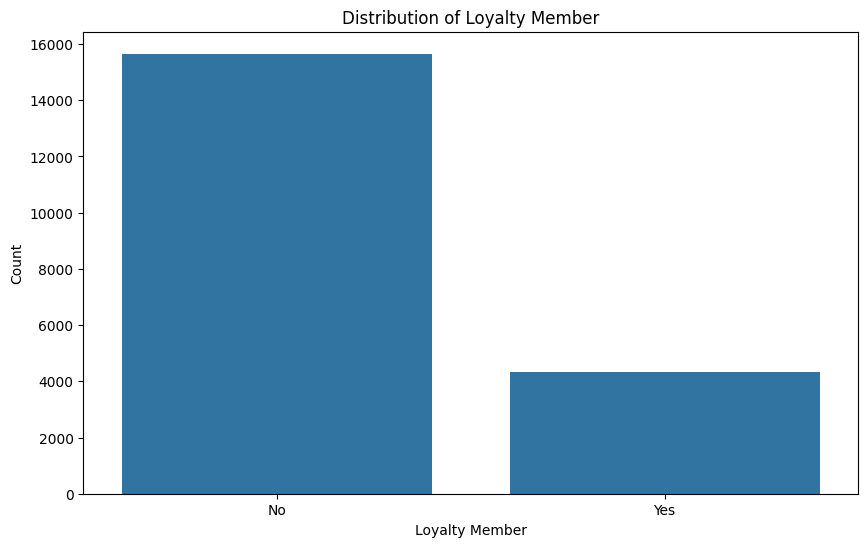

In [22]:
# Visualizing the distribution of 'Loyalty Member' before it has been converted to binary
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loyalty Member')
plt.title('Distribution of Loyalty Member')
plt.xlabel('Loyalty Member')
plt.ylabel('Count')
plt.show()

## Histograms of Numeric Variables

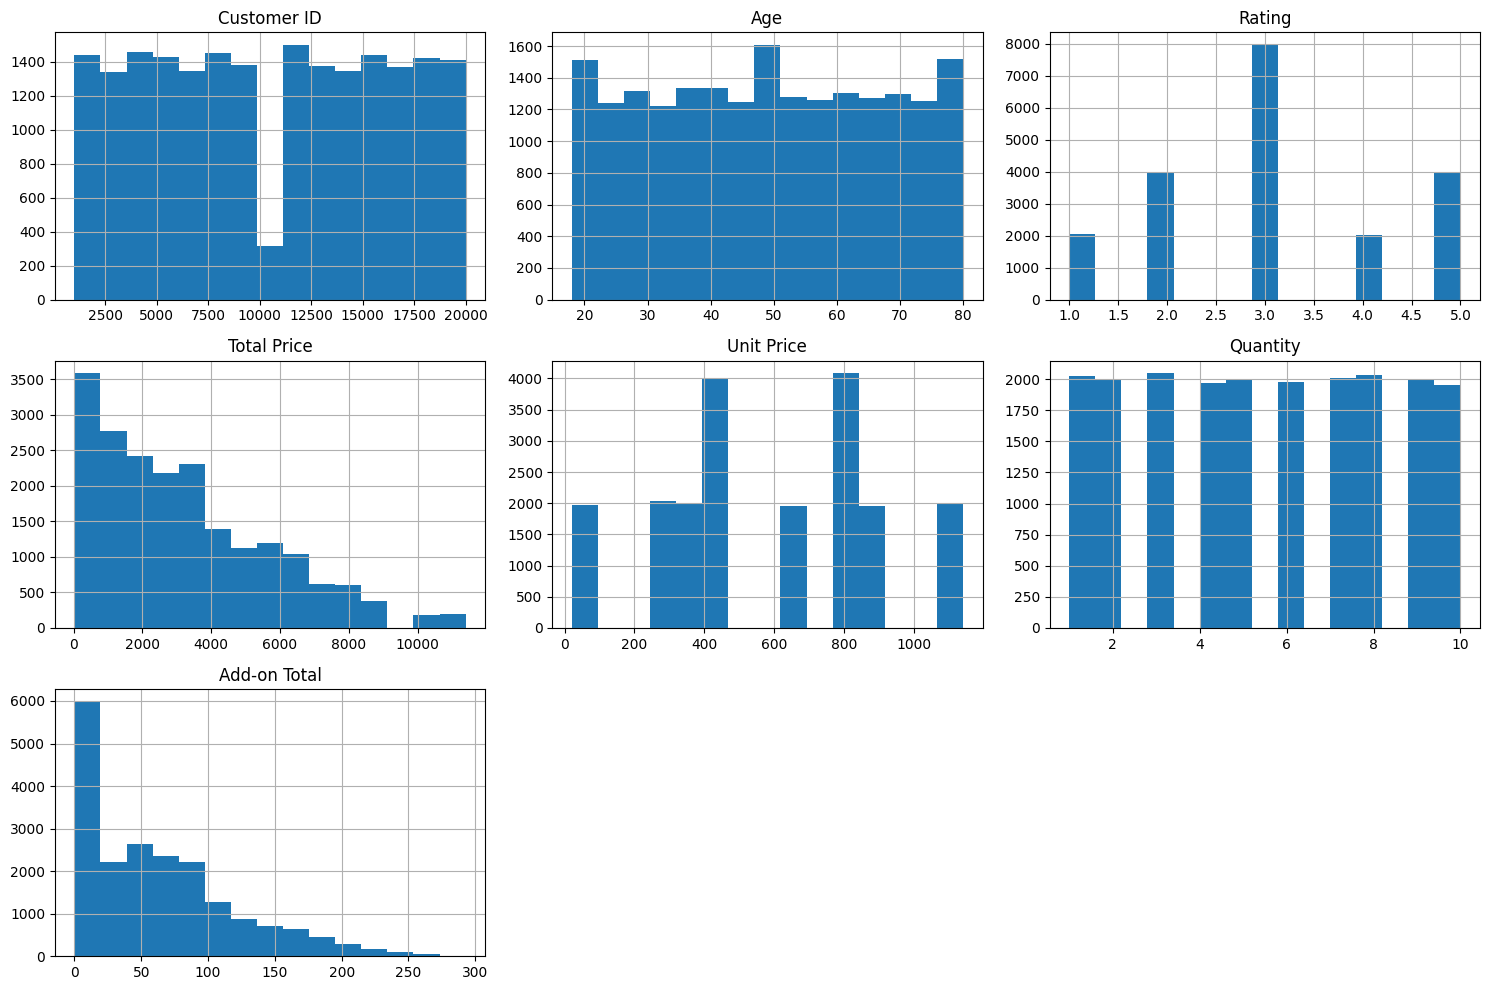

In [23]:
# Histograms of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

## Heatmap of Numeric Variables

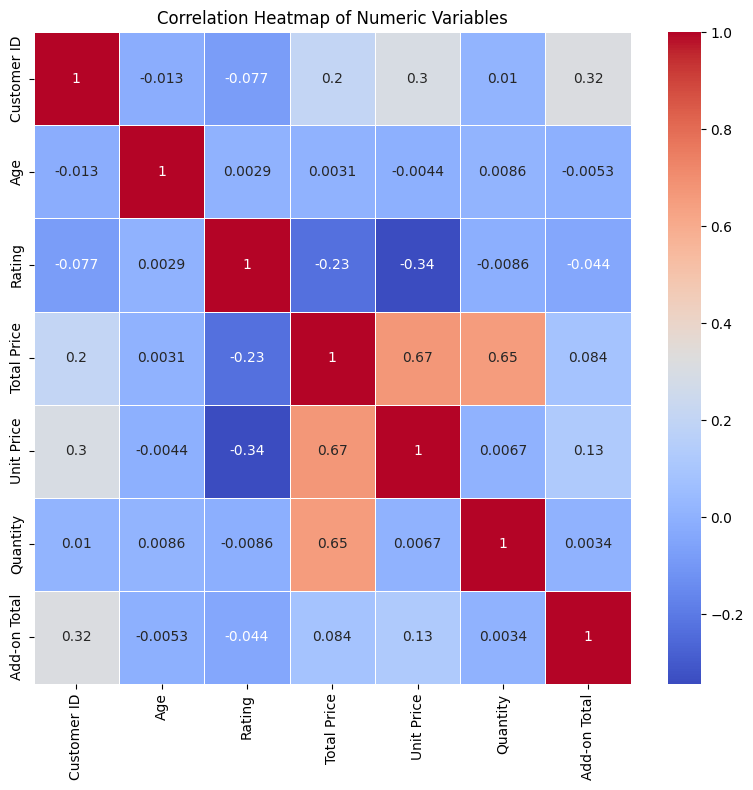

In [24]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot a heatmap of correlations between numeric variables
plt.figure(figsize=(8, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Penalized Regression

Understanding customer purchasing behavior is critical for optimizing product offerings and driving revenue in the electronics retail sector. In this scenario I am a data analyst for an electronics company, I undertook this analysis to explore the relationship between customer demographics, product features, and transaction details with the quantity of items purchased. Using a dataset of 20,000 sales records from the electronics industry, I aimed to predict purchase quantities while uncovering key contributing factors. The analysis employed Ridge and Lasso regression—techniques well-suited for high-dimensional data—to model these relationships and evaluate their predictive power. This report outlines the findings, emphasizing the comparative performance of the models, insights derived from the coefficients, and limitations encountered during the analysis.

## Regression Package Imports

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Regression Data Preparation

In [26]:
# Fill missing values (if any)
dfReg = df.copy()

dfReg.fillna('Unknown', inplace=True)

# Select Independent variables and target variable
columns_to_drop = [col for col in ['Quantity', 'CustomerID', 'SKU', 'Purchase Date'] if col in df.columns]
X = dfReg.drop(columns=columns_to_drop)  # Drop unrelated columns
y = dfReg['Quantity']

# Preprocessing: OneHotEncode categorical features, scale numerical features for modeling
numeric_features = ['Rating', 'Total Price', 'Unit Price', 'Add-on Total']
categorical_features = ['Gender', 'Loyalty Member', 'Product Type', 'Order Status', 'Payment Method', 'Shipping Type', 'Add-ons Purchased']

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Ridge Regression Model
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

# Lasso Regression Model
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])

## Running Models

In [27]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge and Lasso Models
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Predictions
ridge_predictions = ridge_pipeline.predict(X_test)
lasso_predictions = lasso_pipeline.predict(X_test)

# Evaluate Models
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

Ridge Regression MSE: 1.893315025610802
Lasso Regression MSE: 1.9435267224717974


### Cross Validation 

In [28]:
# Robustness Check: Cross-Validation
ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Ridge Cross-Validation MSE: {-np.mean(ridge_cv_scores)}")
print(f"Lasso Cross-Validation MSE: {-np.mean(lasso_cv_scores)}")

Ridge Cross-Validation MSE: 1.9014162823464769
Lasso Cross-Validation MSE: 1.9426595857332465


In [29]:
# Print Coefficients for Ridge and Lasso Models, Sorted from Greatest to Least
# Assuming `ridge_pipeline` and `lasso_pipeline` include the estimator as the last step
ridge_coefficients = ridge_pipeline.named_steps['ridge'].coef_  # Replace 'ridge' with the name of the Ridge step
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_  # Replace 'lasso' with the name of the Lasso step

# Pair coefficients with feature names
# Replace `X.columns` with the actual feature names if X is a pandas DataFrame
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Combine feature names with coefficients and sort
ridge_sorted = sorted(zip(feature_names, ridge_coefficients), key=lambda x: abs(x[1]), reverse=True)
lasso_sorted = sorted(zip(feature_names, lasso_coefficients), key=lambda x: abs(x[1]), reverse=True)

print("Ridge Coefficients (Sorted by Absolute Value):")
for feature, coef in ridge_sorted:
    print(f"{feature}: {coef}")

print("\nLasso Coefficients (Sorted by Absolute Value):")
for feature, coef in lasso_sorted:
    print(f"{feature}: {coef}")



Ridge Coefficients (Sorted by Absolute Value):
Age: 3.4181803866938085
Gender: -2.2826159414867733
Unit Price: 0.058532131810554215
Add-ons Purchased: -0.05547165513112074
Rating: 0.028373294680669063
Shipping Type: -0.02516323592612231
Order Status: -0.023729807974637775
Customer ID: -0.015826020317479896
Add-on Total: 0.013702150292725368
Product Type: -0.004643486705071818
Loyalty Member: 0.003833134353613591
Total Price: 0.0032194392963363285
Payment Method: -0.0032194392953091154

Lasso Coefficients (Sorted by Absolute Value):
Age: 3.1128029800411947
Gender: -1.97699167767297
Customer ID: 0.0
Loyalty Member: -0.0
Product Type: -0.0
Rating: 0.0
Order Status: -0.0
Payment Method: -0.0
Total Price: 0.0
Unit Price: 0.0
Shipping Type: -0.0
Add-ons Purchased: -0.0
Add-on Total: 0.0


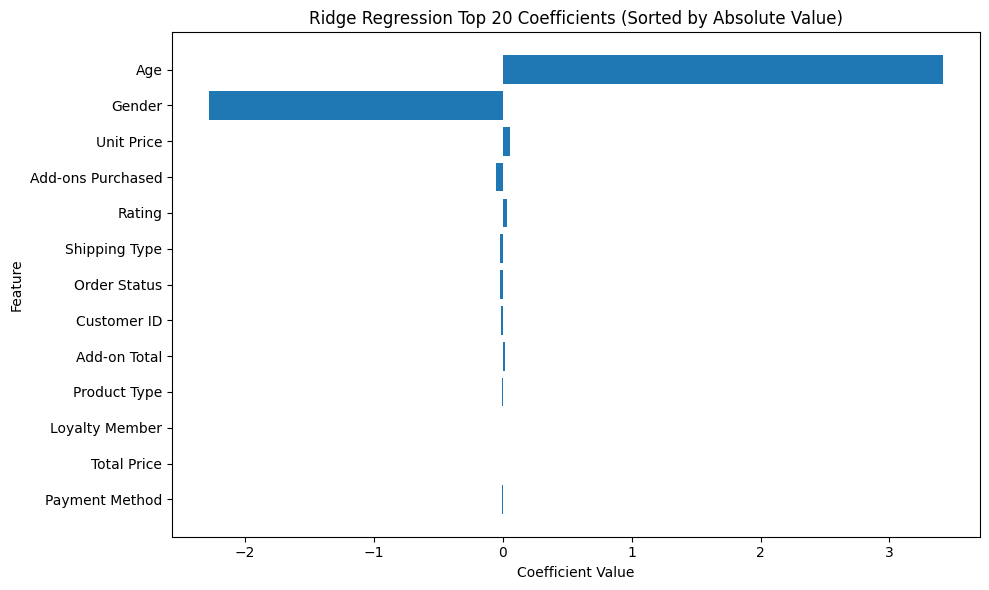

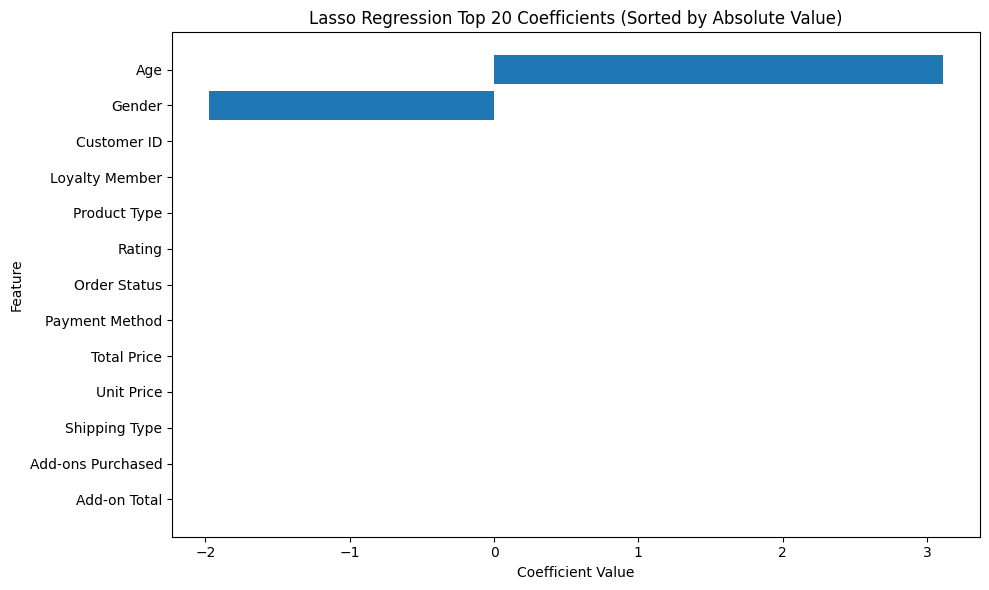

In [ ]:

# Plot Coefficients for Ridge and Lasso Models
def plot_coefficients(coefficients, model_name, top_n=20):
    # Slice top N coefficients
    top_coefficients = coefficients[:top_n]
    features, values = zip(*top_coefficients)  # Unzip the sorted coefficients

    plt.figure(figsize=(10, 6))
    plt.barh(features, values, align='center')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'{model_name} Top {top_n} Coefficients (Sorted by Absolute Value)')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()

# Sort coefficients for plotting
ridge_sorted = sorted(zip(feature_names, ridge_coefficients), key=lambda x: abs(x[1]), reverse=True)
lasso_sorted = sorted(zip(feature_names, lasso_coefficients), key=lambda x: abs(x[1]), reverse=True)

# Plot Top 20 Ridge Coefficients
plot_coefficients(ridge_sorted, "Ridge Regression", top_n=20)

# Plot Top 20 Lasso Coefficients
plot_coefficients(lasso_sorted, "Lasso Regression", top_n=20)
##


## Comparison of Model Predictions for Total Price vs Quantity Purchased

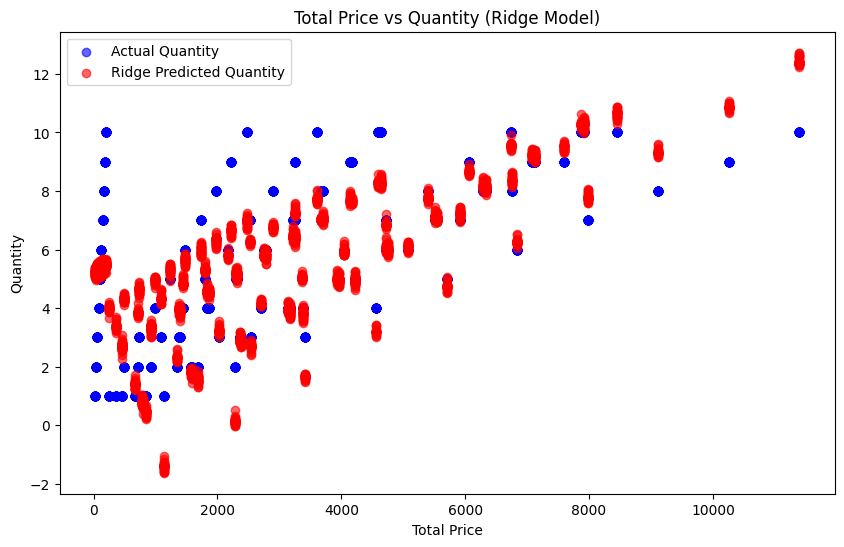

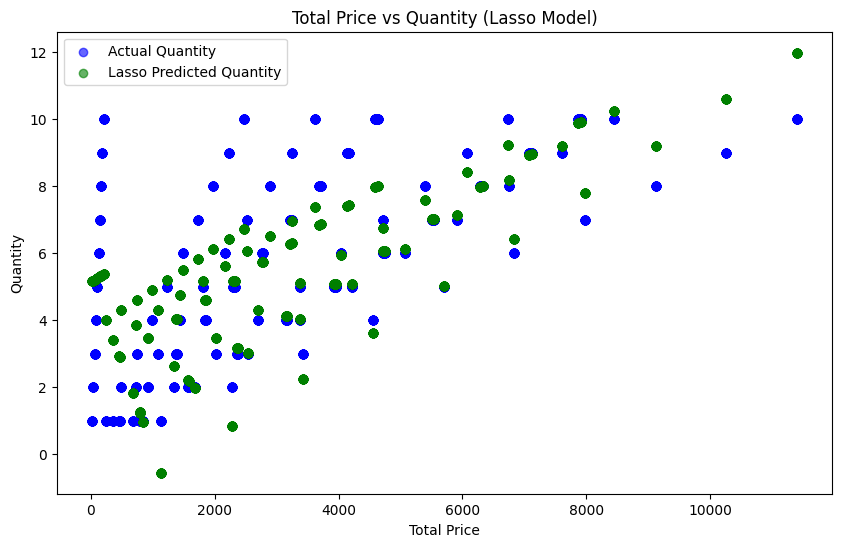

In [31]:
# Scatter plot: Total Price vs Quantity with predictions from Ridge model
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Total Price'], y_test, color='blue', label='Actual Quantity', alpha=0.6)
plt.scatter(X_test['Total Price'], ridge_predictions, color='red', label='Ridge Predicted Quantity', alpha=0.6)
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.title('Total Price vs Quantity (Ridge Model)')
plt.legend()
plt.show()

# Scatter plot: Total Price vs Quantity with predictions from Lasso model
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Total Price'], y_test, color='blue', label='Actual Quantity', alpha=0.6)
plt.scatter(X_test['Total Price'], lasso_predictions, color='green', label='Lasso Predicted Quantity', alpha=0.6)
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.title('Total Price vs Quantity (Lasso Model)')
plt.legend()
plt.show()

## Penalized Regression Conclusion

The findings reveal that Ridge regression slightly outperformed Lasso regression in predicting the quantity of items purchased, with a lower mean squared error (MSE) of 1.89 compared to 1.94. Ridge regression also provided more interpretable coefficients, highlighting Age and Gender as the most influential predictors. While both models captured trends effectively, they struggled with high variance in actual quantities for higher total prices.

This analysis has its limitations. The reliance on linear regression assumes a linear relationship between predictors and the target variable, which might not fully capture complex interactions. Additionally, categorical variables were one-hot encoded, increasing dimensionality and potentially impacting model interpretability. Missing data handling, such as imputing unknown values, may have introduced biases.

To ensure robustness, cross-validation was performed, confirming the models' generalizability. However, future work should include alternative metrics like R² and explore non-linear modeling approaches (e.g., decision trees or neural networks) to enhance predictive accuracy. These findings provide a foundational understanding of purchasing behavior, informing strategic decisions on pricing, promotions, and product placements.

# Ensemble Methods

## Ensemble Methods Package Imports

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


## Ensemble Methods Data Preparation

In [33]:
dfEnsemble = df.copy()

# Remove 'Customer ID' from the dataset
if 'Customer ID' in dfEnsemble.columns:
    dfEnsemble.drop(columns=['Customer ID'], inplace=True)

# Fill missing values in 'Add-ons Purchased' with a default value of 0, easy fix since there's only one missing value.
dfEnsemble['Add-ons Purchased'].fillna(0, inplace=True)

# Identify categorical features
categorical_columns = dfEnsemble.select_dtypes(include=['object']).columns

# One-hot encode all categorical features
dfEnsemble = pd.get_dummies(dfEnsemble, columns=categorical_columns)

# Label encode 'Gender' and other binary categorical features
if 'Gender' in dfEnsemble.columns:
    le = LabelEncoder()
    dfEnsemble['Gender'] = le.fit_transform(dfEnsemble['Gender'])
if 'Loyalty Member' in dfEnsemble.columns:
    dfEnsemble['Loyalty Member'] = le.fit_transform(dfEnsemble['Loyalty Member'])

# Verify that all features are numerical
for column in dfEnsemble.columns:
    if dfEnsemble[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")


## Running Model

In [34]:
# Define features and target variable
X = dfEnsemble.drop(columns=['Total Price'])
y = dfEnsemble['Total Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Cross-Validation Step - Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

### Final Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2
)
rf_grid_search.fit(X_train, y_train)

# Best model and parameters
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  11.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  11.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  14.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  11.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  13.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  26.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  24.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  23.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  26.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  21.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  46.5s
[CV] END max_depth=10, min_samples_split=2, n_e

## Evaluating Ensemble Model

In [36]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Cross-validation RMSE results (assuming `cv_results` contains cross-validation scores)
cv_rmse = np.sqrt(-cv_scores)  # Convert neg_mean_squared_error to RMSE
mean_cv_rmse = np.mean(cv_rmse)

# Print results
print("Cross-Validation RMSE Scores: ", cv_rmse)
print("Mean Cross-Validation RMSE: ", mean_cv_rmse)

# Non-Cross-validation RMSE
print(f'Test RMSE: {rmse}')


# Extract feature importance
feature_importances = best_rf_model.feature_importances_

# Combine feature names and their importance
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
feature_importance_list = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print feature importance
print("Feature Importances:")
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.4f}")


Cross-Validation RMSE Scores:  [nan nan nan nan nan]
Mean Cross-Validation RMSE:  nan
Test RMSE: 7.583673767286515e-12
Feature Importances:
Quantity: 0.5158
Unit Price: 0.3951
SKU_SMP234: 0.0518
Product Type_Smartphone: 0.0181
SKU_SKU1001: 0.0122
Product Type_Laptop: 0.0015
Product Type_Tablet: 0.0010
Product Type_Headphones: 0.0010
SKU_LTP123: 0.0009
SKU_HDP456: 0.0008
SKU_SKU1002: 0.0007
SKU_SKU1003: 0.0003
Product Type_Smartwatch: 0.0003
Rating: 0.0003
SKU_SKU1005: 0.0000
SKU_SKU1004: 0.0000
SKU_TBL345: 0.0000
SKU_SWT567: 0.0000
Add-ons Purchased_Accessory,Accessory: 0.0000
Purchase Date_2023-11-23: 0.0000
Add-ons Purchased_Accessory,Impulse Item,Impulse Item: 0.0000
Purchase Date_2024-01-27: 0.0000
Purchase Date_2023-12-09: 0.0000
Age: 0.0000
Add-on Total: 0.0000
Order Status_Completed: 0.0000
Loyalty Member_No: 0.0000
Add-ons Purchased_Extended Warranty, Impulse Item, Extended Warranty: 0.0000
Purchase Date_2024-06-03: 0.0000
Add-ons Purchased_Extended Warranty: 0.0000
Add-ons Pur

## Visualizing Ensemble Method Feature Importance

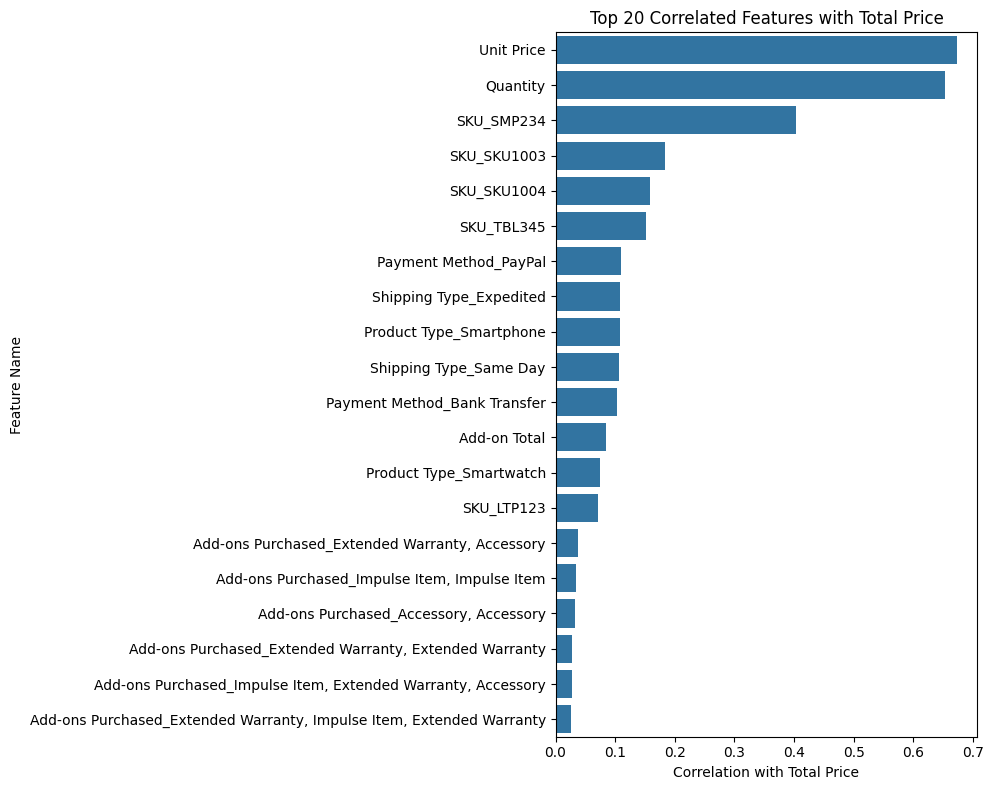

In [37]:
# Calculate correlations with the target variable
correlations = dfEnsemble.corr()['Total Price'].sort_values(ascending=False)

# Select the top 20 correlated features (excluding the target itself)
top_features = correlations[1:21]  # Exclude 'Total Price' itself

# Plot correlation with the target variable using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, orient='h')
plt.xlabel('Correlation with Total Price')
plt.ylabel('Feature Name')
plt.title('Top 20 Correlated Features with Total Price')
plt.tight_layout()
plt.show()

## Visualizing Model Performance

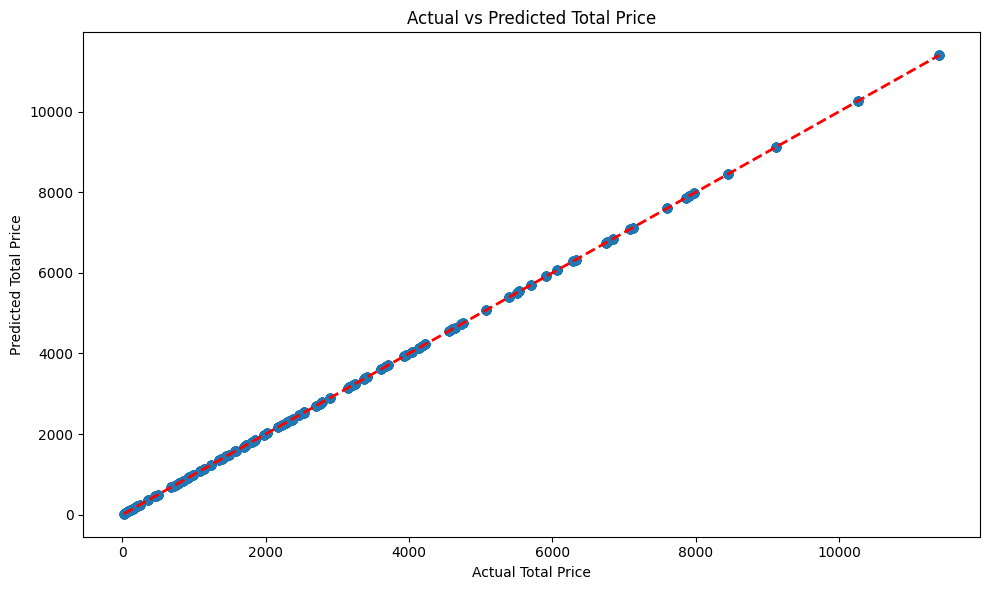

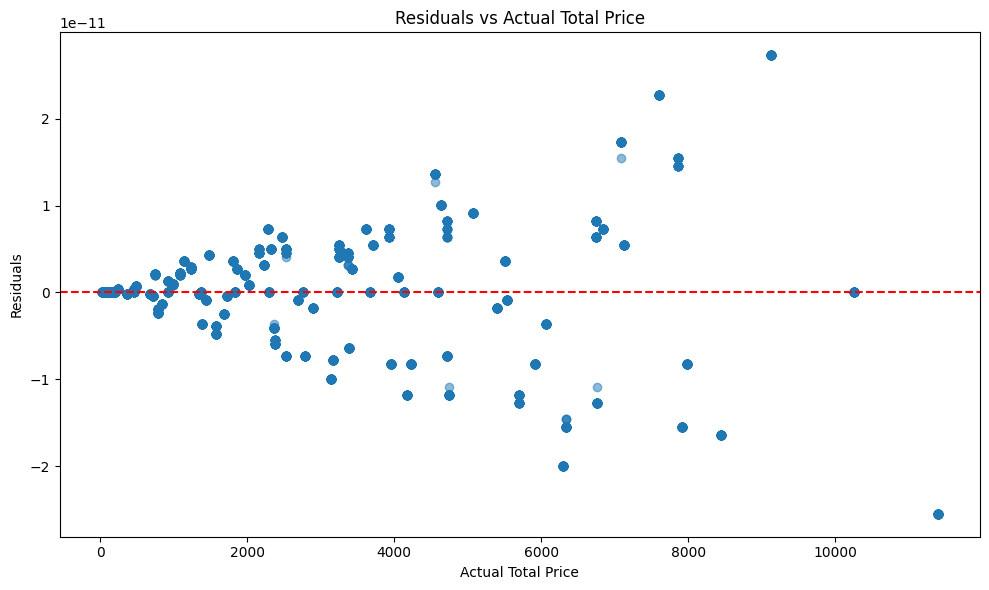

In [38]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.tight_layout()
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Take a sample of residuals to avoid memory issues
sampled_residuals = residuals.sample(frac=0.1, random_state=42)  # Use 10% of data


plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Total Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Total Price')
plt.tight_layout()
plt.show()

# PCA and Clustering Analysis Methods

In this analysis, Principal Component Analysis (PCA) and clustering techniques are used to segment customers in an e-commerce electronics dataset. The objective was to uncover customer patterns, reduce data dimensionality, and optimize interpretability. Using sales data from September 2023 to September 2024, we standardized numeric features, applied PCA for dimensionality reduction, and performed KMeans clustering on both raw and PCA-transformed datasets.

The primary question driving this analysis was: How can PCA and clustering techniques uncover distinct customer segments while improving interpretability?

Through this process, we aimed to address issues of multicollinearity and high-dimensional noise while ensuring the clusters identified were robust and meaningful.

## PCA and Clustering Analysis Imports

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## PCA and Clustering Data Preparation

In [40]:
# Standardize the numeric features
dfPCA = df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfPCA[numeric_cols])

## Performing PCA Analysis

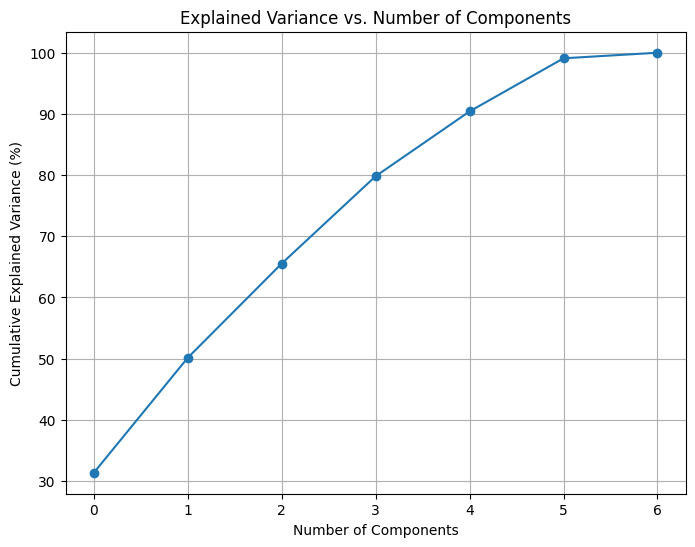

In [41]:
# Fit PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Performing PCA with Components

In [42]:
# Decide on the number of components (e.g., 2 components explain sufficient variance)
n_components = 4 # chose 4 components because the threshold for cumulative explained variance begins at 5 components

# Perform PCA with selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

## Performing Cluster Analysis

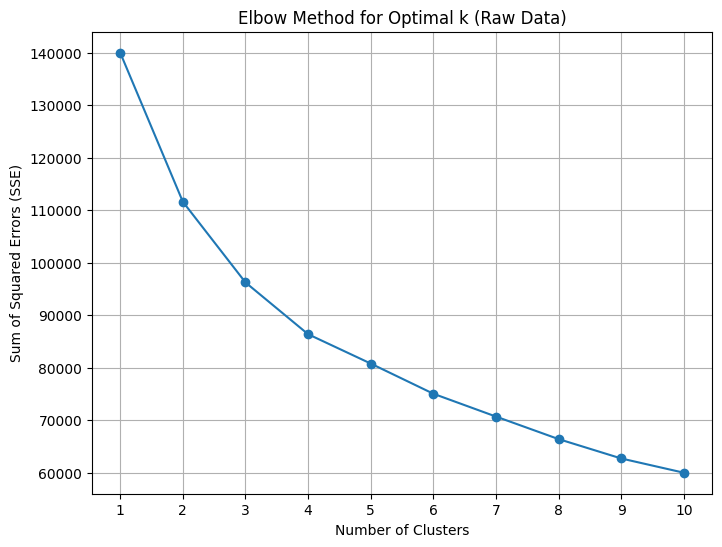

In [43]:
# Determine optimal number of clusters using Elbow method
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (Raw Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Optimal K and KMeans Clustering 

In [44]:
# From the plot, choose optimal k (e.g., k=3)
k_optimal = 3

# KMeans clustering on raw data
kmeans_raw = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster_Raw'] = kmeans_raw.fit_predict(df_scaled)

### Cluster Analysis on PCA Data

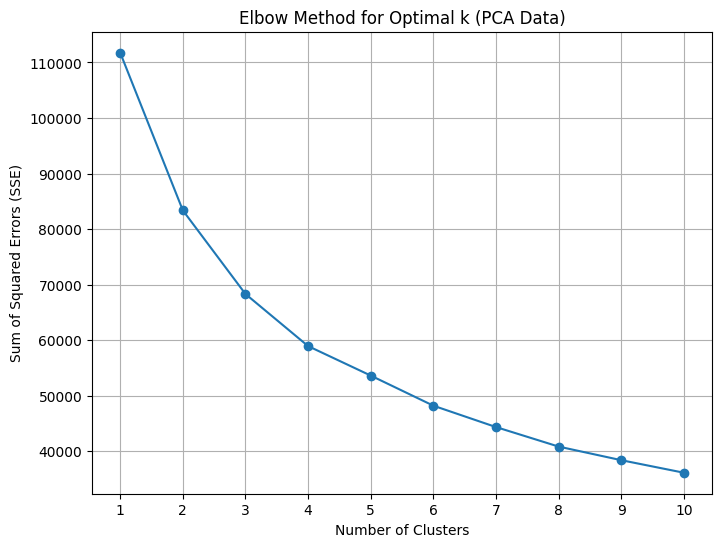

In [45]:
# Determine optimal number of clusters using Elbow method
sse_pca = []
for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(principal_df)
    sse_pca.append(kmeans_pca.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Again, choose k=3
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
principal_df['Cluster_PCA'] = kmeans_pca.fit_predict(principal_df)

## Visualizing Cluster Analysis

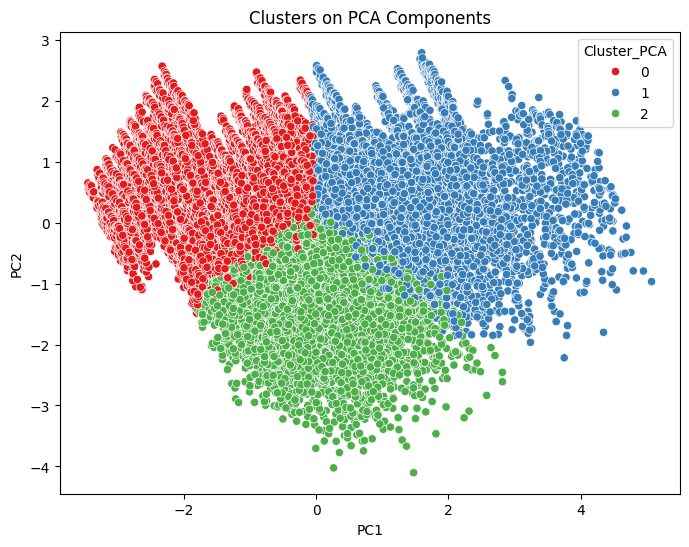

In [46]:
# Visualize clusters on PCA data
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=principal_df, palette='Set1')
plt.title('Clusters on PCA Components')
plt.show()

## Comparing Clustering Results

In [47]:
# Merge cluster labels
df_clusters = df[['Cluster_Raw']].join(principal_df[['Cluster_PCA']])

# Crosstab of clusters
cluster_comparison = pd.crosstab(df_clusters['Cluster_Raw'], df_clusters['Cluster_PCA'])
print("\nCrosstab of clusters from raw data and PCA data:")
print(cluster_comparison)


Crosstab of clusters from raw data and PCA data:
Cluster_PCA     0     1     2
Cluster_Raw                  
0            5781    18    26
1             309    59  6920
2              28  6726   133


**Summary Comment:**
PCA Analysis and Dimensionality Reduction:

PCA was applied to the standardized numeric features of the dataset, enabling us to condense the data into fewer components. The "Explained Variance vs. Number of Components" graph demonstrated that the first 4 components captured over 90% of the variance, making them suitable for downstream analysis.
The reduction in dimensionality facilitated better insights by focusing on the most significant data variations.


Clustering on Raw vs. PCA-Transformed Data:

KMeans clustering was conducted on both raw and PCA-transformed datasets. The "Elbow Method" was used to identify the optimal number of clusters (k=3), as evident from the point of diminishing returns in the sum of squared errors (SSE) plots.
Clustering on the PCA-transformed data resulted in well-separated clusters, as visualized in the "Clusters on PCA Components" scatterplot. These clusters were less influenced by multicollinearity and high-dimensional noise compared to clusters derived from raw data.


Cluster Comparison:

A crosstab comparing raw and PCA-based clusters revealed alignment in some cases but also highlighted significant differences. This demonstrates the effectiveness of PCA in capturing the underlying structure of the data.


Insights and Conclusions:

PCA and clustering together proved to be powerful tools for customer segmentation. Clustering on PCA-transformed data provided interpretable results, enhancing our understanding of distinct customer groups.
While raw data clustering leveraged the original feature space, it was susceptible to noise and redundancy from correlated features.


Assumptions and Limitations:

The analysis assumes that PCA adequately captures the most significant variances and that KMeans clustering's assumption of spherical clusters is valid for this dataset.
Excluding categorical and binary features from PCA may have limited the richness of segmentation insights. The subjectivity in choosing the number of clusters (k=3) could also impact the results.

# Neural Networks

This section focuses on developing and evaluating a neural network model to predict customer ratings (1 to 5) based on features from an e-commerce electronics dataset. The primary goal is to explore how well a neural network, optimized with techniques like dropout, batch normalization, and L2 regularization, can classify customer ratings and provide insights into their distribution. Additionally, we employed preprocessing steps such as feature scaling, one-hot encoding, and class balancing to handle data-specific challenges and ensure better model performance.


## Neural Networks Package Imports

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.utils import to_categorical


## Neural Network Data Preparation

In [49]:
# Data Preprocessing
dfNN = df.copy()
# Handling missing values (if any)
dfNN['Add-ons Purchased'].fillna(0, inplace=True)

# Encoding categorical variables (one-hot encoding)
dfNN = pd.get_dummies(dfNN, drop_first=True)

# Verify and filter invalid Ratings
dfNN = dfNN[dfNN['Rating'].between(1, 5)]

# Defining Independent and Dependent Variables
X = dfNN.drop(['Rating'], axis=1)  # Independent variables
y = dfNN['Rating']  # Dependent variable

# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify target values after splitting
print(y_train.min(), y_train.max())
print(y_test.min(), y_test.max())

# Convert target variable to categorical AFTER splitting
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train - 1, num_classes=5)  # Map 1-5 to 0-4
y_test_categorical = to_categorical(y_test - 1, num_classes=5)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


1 5
1 5


In [50]:
import numpy as np
print(np.unique(y_train_categorical.argmax(axis=1) + 1, return_counts=True))


(array([1, 2, 3, 4, 5], dtype=int64), array([1653, 3179, 6399, 1618, 3151], dtype=int64))


## Neural Network Model

In [51]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Building the Neural Network with Dropout, Batch Normalization, and L2 Regularization
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax'))  # 5 output units for 5 classes

# Compiling the Neural Network
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  # Lower the learning rate
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is not one-hot encoded when computing class weights
y_train_classes = y_train.argmax(axis=1) if len(y_train.shape) > 1 else y_train

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

# Recompute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_classes), y=y_train_classes)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Optionally adjust weights for class 1 (reduce its weight slightly)
class_weights_dict[0] *= .934  # Reduce weight for class 1 by 20%

class_weights_dict[1] *= 0.97  # Reduce weight for class 1 by 20%

# Optionally adjust weights for class 1 (reduce its weight slightly)
class_weights_dict[2] *= 0.965  # Reduce weight for class 1 by 20%

class_weights_dict[3] *= .955  # Reduce weight for class 1 by 20%

class_weights_dict[4] *= 0.97  # Reduce weight for class 1 by 20%



# Training the Neural Network with Early Stopping
history = model.fit(
    X_train, 
    y_train_categorical, 
    epochs=200, 
    batch_size=30, 
    validation_split=0.2, 
    callbacks=[early_stopping],
    class_weight=class_weights_dict  # Add class weights here
)


# Evaluate the model
eval_results = model.evaluate(X_test, y_test_categorical)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1) + 1  # Convert predicted probabilities to class labels (1-5)

# Checking accuracy counts
unique, counts = np.unique(y_pred_classes, return_counts=True)
print("Predicted class distribution:", dict(zip(unique, counts)))


# Convert one-hot encoded y_test to class labels
y_test_classes = y_test_categorical.argmax(axis=1) + 1

# Check if lengths match
if len(y_test_classes) != len(y_pred_classes):
    raise ValueError("Mismatch in lengths of actual and predicted values.")

# Create results DataFrame
results_df = pd.DataFrame({'Actual': y_test_classes, 'Predicted': y_pred_classes})




Epoch 1/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2437 - loss: 1.8557 - val_accuracy: 0.4541 - val_loss: 1.4319
Epoch 2/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4255 - loss: 1.3989 - val_accuracy: 0.5797 - val_loss: 1.1534
Epoch 3/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5614 - loss: 1.1924 - val_accuracy: 0.5825 - val_loss: 1.0066
Epoch 4/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5979 - loss: 1.1015 - val_accuracy: 0.5859 - val_loss: 0.9707
Epoch 5/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5981 - loss: 1.0756 - val_accuracy: 0.5822 - val_loss: 0.9495
Epoch 6/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6089 - loss: 1.0476 - val_accuracy: 0.5863 - val_loss: 0.9426
Epoch 7/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6140 - loss: 1.0218 - val_accuracy: 0.5856 - val_loss: 0.9479
Epoch 8/200
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6084 - loss: 1.0224 - val_accu

## Evaluating Model and Model Results 

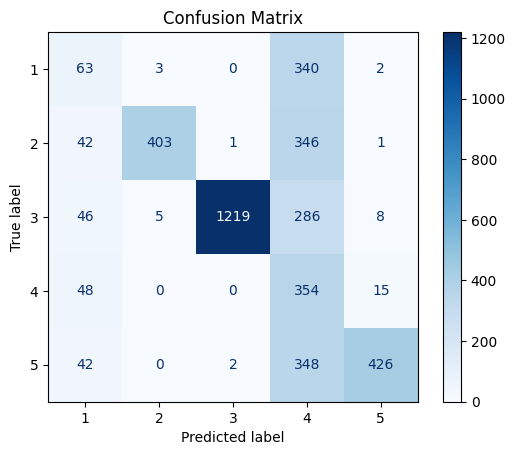

Accuracy: 0.62


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues', xticks_rotation=0)
plt.title('Confusion Matrix')
plt.show()

# Classification Metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")


Data Preprocessing:

Missing values in the Add-ons Purchased column were handled by filling them with 0.
Ratings were filtered to ensure they fall within the valid range of 1 to 5.
Features were scaled using StandardScaler to ensure the neural network's stability during training.


Model Architecture:

A multi-layer perceptron (MLP) was built using the Sequential API in TensorFlow.
The architecture included:
Dense layers with ReLU activation and L2 regularization.
Batch normalization to stabilize and accelerate training.
Dropout layers to prevent overfitting.
A final softmax layer with 5 units for multiclass classification.
The Adam optimizer with a learning rate of 0.001 was used, and class weights were incorporated to handle class imbalances.


Training and Evaluation:

Early stopping was implemented to prevent overfitting and reduce training time.
The model achieved a training accuracy of ~61% and a validation accuracy of ~59%, indicating reasonable performance for a multi-class problem.
On the test set, the model achieved a test accuracy of 61%, as shown in the classification metrics.


Confusion Matrix and Predictions:

The confusion matrix revealed areas where the model struggled, particularly in distinguishing between adjacent ratings (e.g., 2 and 3).
The predicted class distribution was fairly balanced, though some ratings (e.g., 3 and 4) had higher prediction counts, suggesting possible class overlap in the feature space.


Insights and Limitations:

The neural network effectively classified ratings with moderate accuracy but exhibited difficulties with subtle differences between adjacent classes.
Preprocessing techniques like class balancing and feature scaling improved the model's generalizability.
Limitations included potential loss of information due to categorical encoding and the sensitivity of neural networks to hyperparameter choices.


Future Steps:

Experiment with alternative architectures, such as convolutional or recurrent layers, for more complex feature interactions.
Perform hyperparameter optimization using grid or random search to further improve model performance.
Investigate ensemble methods or hybrid models that combine neural networks with traditional machine learning techniques.